# Different Types of Reinforcement Learning Algorithms

In this notebook we will be talking about reinforcement learning algorithms. Mainly two types,
    
    1. Upper Confidence Bound (UCB) Algorithm
    2. Thompson Sampling Algorithm

## What is Reinforcement (Online) Learning ?


Reinforcement Learning(RL) is a type of machine learning technique that enables an agent to learn in an interactive environment by trial and error using feedback from its own actions and experiences. 

Read : https://towardsdatascience.com/reinforcement-learning-101-e24b50e1d292

* Unlike in the supervised learning where all the correct actions are passed to the model, model does not need to worry about them, it just have to identify the patterns and come up with the output

* Where in RL Actions are taken by the model itself and come to learn. And through Reward and Penalties, Model get to learn whether the action it took was right or wrong.

> So in here we will be talking about a problem where company is displaying 10 different adds to 10000 users each time they logged into their social media and they want to optimize their spending on adds and eventually picked the ad that gives the most Click Through Rate (CTR). In reality this model is going to learn in realtime, hence the name 'Online Learning'. But in this case we have a dataset iterate over each time sequentially just to simulate the model receiving data in real life.

* And the other fun part is there is no Library for this and we are going to implement this from scratch. Algorithm we are going to implement is as follows.

<img src="images/RL_1.png"/>

In [1]:
# Lets get started

# importing the main modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setting a random seed just incase
np.random.seed(42)

In [25]:
# Import the data
data = pd.read_csv('data/Upper Confidence Bound (UCB)/Ads_CTR_Optimisation.csv')
data.head(11)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [3]:
# just to make sure lets see if there are any missing values
data.isna().sum()

Ad 1     0
Ad 2     0
Ad 3     0
Ad 4     0
Ad 5     0
Ad 6     0
Ad 7     0
Ad 8     0
Ad 9     0
Ad 10    0
dtype: int64

In [4]:
# No missing values.. Great
# So what does this data set represent

# Row - corresponding to a user clicking or not clicking the ad ( considered as one round )
# column - each different type of add

In [17]:
import math

# initializing the variables

ads = 10
rounds = 10000
# keep track of how many times each ad got selected at the end of each round
number_of_times_ad_got_selected = [0]*ads
# Keep track of the rewards of each ad
rewards_of_ads = [0]*ads

# keep track of the add select at the end of each round (add with the higher upper bound)
selected_ad_end_of_round = []
# Keep Track of the Total rewards
total_reward = 0

# Now lets go through each round
for n in range(rounds):
    selected_ad = 0
    max_upper_bound = 0
    
    # for each round we have to go through each add
    for i in range(ads):
        # for each add we have to calculate average reward and upper bound of the confidence level
        # and selectd the add with most upper bound at the end of the round
        current_upper_bound_of_ad = 0
        
        # But for the first 10 rounds we have to select each add and gather information
        # so if it was the first time the add is being shown to the user, we will set a very high upper bound for that add
        # so at the end of the round first ad (Ad0) will be selected as the best ad for Round0
        # if not we will calculate the average reward and new upper bounds
        if number_of_times_ad_got_selected[i]>0:
            avg_reward = rewards_of_ads[i]/number_of_times_ad_got_selected[i] # this is need to calculate delta i
            delta_i = math.sqrt(1.5 * math.log(n+1)/number_of_times_ad_got_selected[i])
            current_upper_bound_of_ad = avg_reward + delta_i
        else:
            current_upper_bound_of_ad = 10**400 # a very high values
        
        if current_upper_bound_of_ad > max_upper_bound:
            max_upper_bound = current_upper_bound_of_ad
            selected_ad = i
    
    # now we have to update selected times so far & rewards so far
    number_of_times_ad_got_selected[selected_ad] = number_of_times_ad_got_selected[selected_ad] + 1
    rewards_of_ads[selected_ad] = rewards_of_ads[selected_ad] + data.iloc[n,selected_ad]
    
    # Updating the selected ad at the end of this round
    selected_ad_end_of_round.append(selected_ad)       
    
    # Updating the total reward
    total_reward = total_reward + data.iloc[n,selected_ad]


In [18]:
# lets see each variable 
number_of_times_ad_got_selected

[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]

In [19]:
# good it seems Ad4 (fifth ad) was selected the most

In [20]:
rewards_of_ads

[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]

In [21]:
# Ad4 has the most rewards

In [22]:
total_reward

2178

In [23]:
selected_ad_end_of_round

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 8,
 9,
 0,
 8,
 1,
 2,
 3,
 4,
 5,
 6,
 6,
 7,
 7,
 7,
 9,
 7,
 0,
 6,
 8,
 1,
 2,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 9,
 7,
 0,
 0,
 6,
 8,
 4,
 0,
 7,
 1,
 1,
 2,
 3,
 5,
 9,
 4,
 1,
 6,
 8,
 0,
 7,
 2,
 3,
 5,
 9,
 4,
 1,
 6,
 8,
 0,
 7,
 7,
 7,
 7,
 7,
 7,
 4,
 2,
 3,
 5,
 9,
 1,
 6,
 8,
 0,
 0,
 7,
 0,
 4,
 1,
 6,
 8,
 2,
 3,
 5,
 9,
 7,
 0,
 4,
 4,
 4,
 7,
 7,
 7,
 7,
 1,
 6,
 8,
 2,
 3,
 5,
 9,
 0,
 7,
 7,
 4,
 7,
 7,
 7,
 1,
 6,
 8,
 0,
 4,
 4,
 2,
 3,
 5,
 9,
 4,
 7,
 0,
 7,
 1,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 8,
 4,
 2,
 3,
 5,
 9,
 7,
 7,
 7,
 0,
 6,
 4,
 1,
 1,
 1,
 8,
 7,
 2,
 3,
 5,
 9,
 4,
 0,
 1,
 1,
 1,
 6,
 7,
 8,
 4,
 1,
 2,
 3,
 5,
 9,
 0,
 6,
 7,
 8,
 4,
 7,
 1,
 0,
 6,
 2,
 3,
 5,
 9,
 7,
 7,
 7,
 7,
 4,
 4,
 4,
 4,
 4,
 7,
 8,
 1,
 0,
 6,
 6,
 6,
 7,
 4,
 2,
 3,
 5,
 9,
 1,
 6,
 8,
 7,
 0,
 4,
 4,
 4,
 4,
 4,
 2,
 3,
 5,
 9,
 1,
 6,
 7,
 4,
 8,
 0,
 7,


#### Intuition about the algorithm

* First of all, __DO NOT THINK ABOUT THE DATASET__. Here the data set is like things that will happen in the future, things that only god have. God was our buddy so he lend us the things that can happen in the future for adds(whether the user will click or not). he told us to not to tell anyone so SHHHHH.....!!!!

* Our Algorithms task is only to show a ad from the 10 ads to a coming user.

* First time algorithm runs it has no previous knowledge about how people have reacted to these ads (whether they clicked or not).

* So our algorith decide, Okay I will show each add to the first ten users, and see if they click it or not.
    * Since we cant actually we can't use 10000 people and do this experiment, we will use gods data, and see if the person will click the ad we show him or not.

* So our algorithm picks the Ad1 as the selected algo for the first user and show it to them, And user clicks it. So we reward the algorithm with one point.

* Then our algorithm picks the Ad2 as the selected algo for the second user and show it to them, And user clicks did not click it. So we reward the algorithm with 0 point.

* So it do that for the first 10 users, So at the end of first 10 users, Our variables looks like this
     * `number_of_times_ad_got_selected = [1,1,1,1,1,1,1,1,1,1]` 
     * `rewards_of_ads = [1,0,0,0,0,0,0,0,0,0]`
     * `total_reward = 1`
     * `selected_ad_end_of_round = [0,1,2,3,4,5,6,7,8,9]`
     * _Now the fun part begins_

* Now for the 11th person, Mr. Algo (why not give a name to our creation)  goes to the first for loop set `selected_ad = 0 & max_upper_bound = 0` _(From here on out we will be a debugger and go through the code line by line bare with me)_
    
    * Go into the  second for loop, `i=0` meaning we are thinking about the Ad1.
        
        1. `if number_of_times_ad_got_selected[i]>0:` this is true since Ad1 was selected during earlier, (`number_of_times_ad_got_selected[0]=1`)
            2. Goes into the if condition and calculates `avg_reward`,`delta_i` & `current_upper_bound_of_ad`, having values respectively,
                * `avg_reward = 1/1 = 1`
                * `delta_i = sqrt(1.5*log(11)/1) = 1.2498`
                * `current_upper_bound_of_ad = 1 + 1.2498 = 2.2498`
            3. Comes to `if current_upper_bound_of_ad > max_upper_bound:` this line, and it yeilds true since it is 2.2498>0.
            4. Goes into that if statement update `selected_ad = i = 0 & max_upper_bound = 2.2498`
            5. Goes back to the start of second for loop
    
    * Go into the  second for loop, `i=1` meaning we are thinking about the Ad2.
    
        1. `if number_of_times_ad_got_selected[i]>0:` this is true since Ad2 was selected during earlier, (`number_of_times_ad_got_selected[1]=1`)
            2. Goes into the if condition and calculates `avg_reward`,`delta_i` & `current_upper_bound_of_ad`, having values respectively,
                * `avg_reward = 0/1 = 0`
                * `delta_i = sqrt(1.5*log(11)/1) = 1.2498`
                * `current_upper_bound_of_ad = 0 + 1.2498 = 1.2498`
            3. Comes to `if current_upper_bound_of_ad > max_upper_bound:` this line, and it yeilds False since it is 1.2498 > 2.2498.
            4. `selected_ad = i = 0 & max_upper_bound = 2.2498` does not change
            5. Goes back to the start of second for loop
            
     * Go into the  second for loop, `i=2` meaning we are thinking about the Ad3.
    
        1. `if number_of_times_ad_got_selected[i]>0:` this is true since Ad3 was selected during earlier, (`number_of_times_ad_got_selected[2]=1`)
            2. Goes into the if condition and calculates `avg_reward`,`delta_i` & `current_upper_bound_of_ad`, having values respectively,
                * `avg_reward = 0/1 = 0`
                * `delta_i = sqrt(1.5*log(11)/1) = 1.2498`
                * `current_upper_bound_of_ad = 0 + 1.2498 = 1.2498`
            3. Comes to `if current_upper_bound_of_ad > max_upper_bound:` this line, and it yeilds False since it is 1.2498 > 2.2498.
            4. `selected_ad = i = 0 & max_upper_bound = 2.2498` does not change
            5. Goes back to the start of second for loop
            
     * For the rest of the `i = 3,4,5,6,7,8,9` values since at first 10 iterations those ads have not being rewarded, upper bound will always be 1.2498 for them 

     * So the second for loop ends Mr.Algo decide after going through 10 ads that for the 11th user he will show the AD1.
     
     * And go to line `number_of_times_ad_got_selected[selected_ad] = number_of_times_ad_got_selected[selected_ad] + 1` and update number of time Ad1 selected by 1
     
     * And Mr.Algo goes to next line `rewards_of_ads[selected_ad] = rewards_of_ads[selected_ad] + data.iloc[n,selected_ad]`, however regardless of Mr. Algo's effort that 11th customer does not click the ad.
     
     * And Mr. Algo is sad cause he did not get any reward, determined to do better next time he goes and finish the rest of the statements.
     
     * so at the begining of 12th customers round, our variables look like this...
         * `number_of_times_ad_got_selected = [2,1,1,1,1,1,1,1,1,1]` _#Gets changed_
         * `rewards_of_ads = [1,0,0,0,0,0,0,0,0,0]` _# Remain same_
         * `total_reward = 1` _# Remain same_
         * `selected_ad_end_of_round = [0,1,2,3,4,5,6,7,8,9,0]
         
* So it goes on to do this for rest, even though at the begining we cant see significant change, at the latter part we can see Mr. Algo select the Ad5 Most of the times. Regardless of the person, because from his past experince he knows it gives the most CTR.

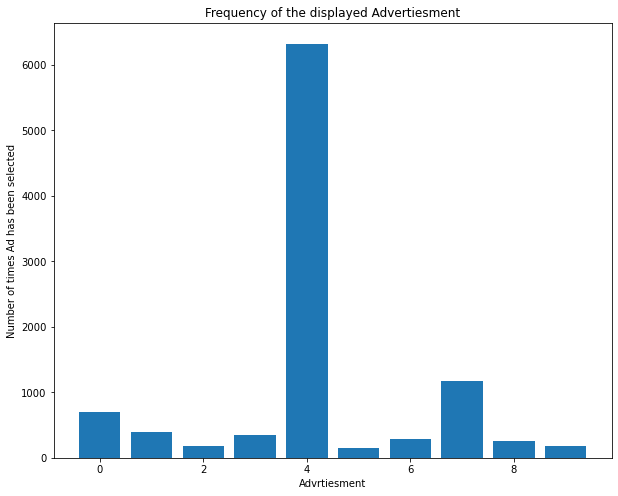

In [43]:
# Now we can visualize this using a histogram
df = pd.DataFrame({'numbers': selected_ad_end_of_round})
#df['numbers'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency')

fig, ax = plt.subplots(figsize=(10,8))
ax.bar(x=df['numbers'].value_counts(sort=False).index,height=df['numbers'].value_counts(sort=False).values)
ax.set_title('Frequency of the displayed Advertiesment')
ax.set_ylabel('Number of times Ad has been selected')
ax.set_xlabel('Advrtiesment');


## 2. Thompson Sampling Algorithm

Here are some of the difference between Upper Confidence Bound (UCB) Algorithm and Thompson Sampling Algorithm,

<img src="images/TS_1.png"/>

And the algorith is as follows,

<img src="images/TS_2.png"/>

In [48]:
# to implement this we can use the earlier code but have to do some few modifications

# So let's get to it shall we?

# importing the main modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setting a random seed just incase
np.random.seed(42)

# Import the data
data = pd.read_csv('data/Upper Confidence Bound (UCB)/Ads_CTR_Optimisation.csv')

import random

# initializing the variables

ads = 10
rounds = 10000

#==========================================Changed=========================================================
# keep track of how many times each ad got rewarded 1 at the end of each round
number_of_times_ad_got_reward_1 = [0]*ads
# keep track of how many times each ad got rewarded 0 at the end of each round
number_of_times_ad_got_reward_0 = [0]*ads
#==========================================================================================================


# keep track of the add select at the end of each round (add with the higher upper bound)
selected_ad_end_of_round = []
# Keep Track of the Total rewards
total_reward = 0

# Now lets go through each round
for n in range(rounds):
    selected_ad = 0
#==========================================Changed=========================================================   
    max_random_beta_value = 0
#==========================================================================================================
    
    # for each round we have to go through each add
    for i in range(ads):
#==========================================Changed=========================================================      
        current_random_beta_value = random.betavariate(number_of_times_ad_got_reward_1[i]+1, number_of_times_ad_got_reward_0[i]+1)
        
        if current_random_beta_value > max_random_beta_value:
            max_random_beta_value = current_random_beta_value
            selected_ad =i
        
        
    # Updating the selected ad at the end of this round
    selected_ad_end_of_round.append(selected_ad)

    # Current Reward
    current_reward = data.iloc[n,selected_ad]

    if current_reward == 1:
        number_of_times_ad_got_reward_1[selected_ad] = number_of_times_ad_got_reward_1[selected_ad] + 1
    else:
        number_of_times_ad_got_reward_0[selected_ad] = number_of_times_ad_got_reward_0[selected_ad] + 1
#==========================================================================================================              
    
    # Updating the total reward
    total_reward = total_reward + data.iloc[n,selected_ad]


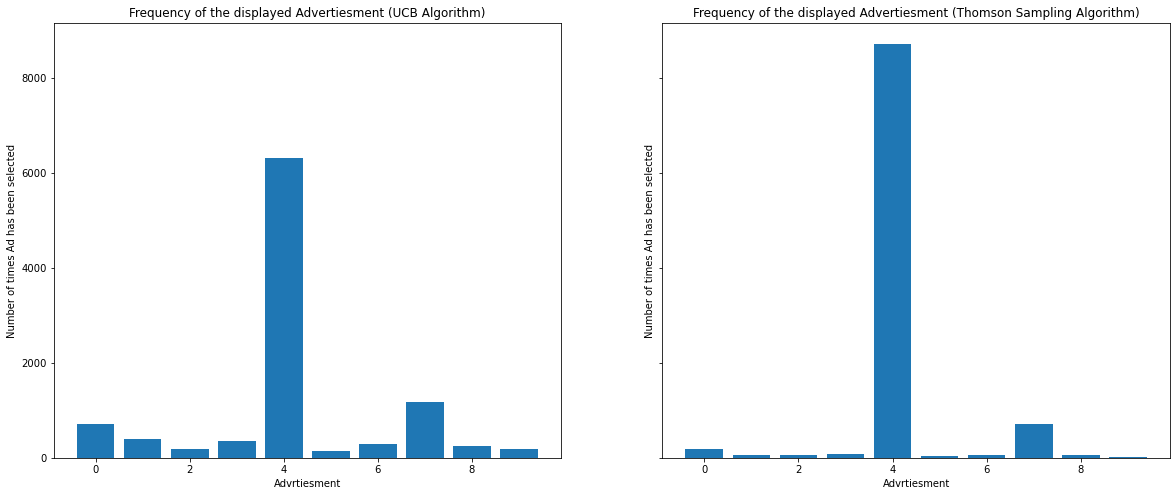

In [49]:
# Now we can visualize this using a histogram
df_1 = pd.DataFrame({'numbers': selected_ad_end_of_round})
#df['numbers'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency')

fig, (ax1,ax2) = plt.subplots(figsize=(20,8),ncols=2,nrows=1,sharey=True)
ax1.bar(x=df['numbers'].value_counts(sort=False).index,height=df['numbers'].value_counts(sort=False).values)
ax1.set_title('Frequency of the displayed Advertiesment (UCB Algorithm)')
ax1.set_ylabel('Number of times Ad has been selected')
ax1.set_xlabel('Advrtiesment')

ax2.bar(x=df_1['numbers'].value_counts(sort=False).index,height=df_1['numbers'].value_counts(sort=False).values)
ax2.set_title('Frequency of the displayed Advertiesment (Thomson Sampling Algorithm)')
ax2.set_ylabel('Number of times Ad has been selected')
ax2.set_xlabel('Advrtiesment');